In [38]:
# Import necessary libraries
import pandas as pd
import datetime
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
# Visulaization
import pydotplus
from IPython.display import Image

In [39]:
# Read CSV file

Merged_df = pd.read_csv(
    Path("/Users/prsm/Desktop/Fintech/Projects/ML_exchange_rate/Prime Rates vs Exchange Rate.csv"),  infer_datetime_format = True, parse_dates = True
)


Merged_df

,Dates,Canadian Dollar ($CADUSD) - Rate Value,Canada Prime Rate (%PRC1) - Rate Value,United States Prime Rate - Rate Value,Prime Rate Difference,Prime Rate Difference Percentage
0,1983-03-30,1.23,11.5,10.50,1.00,-0.086957
1,1983-03-31,1.23,11.5,10.50,1.00,-0.086957
2,1983-04-04,1.24,11.5,10.50,1.00,-0.086957
3,1983-04-05,1.24,11.5,10.50,1.00,-0.086957
4,1983-04-06,1.23,11.5,10.50,1.00,-0.086957
...,...,...,...,...,...,...
9690,2023-03-07,1.37,6.7,7.75,-1.05,0.156716
9691,2023-03-08,1.38,6.7,7.75,-1.05,0.156716
9692,2023-03-09,1.38,6.7,7.75,-1.05,0.156716
9693,2023-03-10,1.38,6.7,7.75,-1.05,0.156716


In [40]:
Merged_df = Merged_df.set_index("Dates")

In [41]:
Merged_df

,Canadian Dollar ($CADUSD) - Rate Value,Canada Prime Rate (%PRC1) - Rate Value,United States Prime Rate - Rate Value,Prime Rate Difference,Prime Rate Difference Percentage
Dates,,,,,
1983-03-30,1.23,11.5,10.50,1.00,-0.086957
1983-03-31,1.23,11.5,10.50,1.00,-0.086957
1983-04-04,1.24,11.5,10.50,1.00,-0.086957
1983-04-05,1.24,11.5,10.50,1.00,-0.086957
1983-04-06,1.23,11.5,10.50,1.00,-0.086957
...,...,...,...,...,...
2023-03-07,1.37,6.7,7.75,-1.05,0.156716
2023-03-08,1.38,6.7,7.75,-1.05,0.156716
2023-03-09,1.38,6.7,7.75,-1.05,0.156716


In [42]:
Merged_df.index = pd.to_datetime(Merged_df.index, errors="coerce")

In [43]:
# Split data into features and target variable
##X = Merged_df[['Canadian Dollar ($CADUSD) - Rate Value', 'Canada Prime Rate (%PRC1) - Rate Value', 'United States Prime Rate - Rate Value']]
##y = Merged_df.index

In [44]:
# Split data into features and target variable
X = Merged_df[['Canadian Dollar ($CADUSD) - Rate Value']]
y = Merged_df[['Prime Rate Difference Percentage']]

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=48)

In [46]:
# Create a random forest regression object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=48)

In [47]:
# Train the random forest regression model on the training data
rf_regressor.fit(X_train, y_train)

/var/folders/6d/hqjy9q1s52z5b3nyzz73wbkm0000gn/T/ipykernel_67329/2876040253.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=48)

In [48]:
# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

In [49]:
# Evaluate the performance of the model
Merged_ML = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
# determine recommendation based on predicted value
Cad_price_pred = Merged_df.iloc[-1]['Canadian Dollar ($CADUSD) - Rate Value']
Exchange_rate = rf_regressor.predict(X.iloc[[-1]][['Canadian Dollar ($CADUSD) - Rate Value']])[0]

In [55]:
print(Merged_df.columns)

Index(['Canadian Dollar ($CADUSD) - Rate Value',
       'Canada Prime Rate (%PRC1) - Rate Value',
       'United States Prime Rate - Rate Value', 'Prime Rate Difference',
       'Prime Rate Difference Percentage'],
      dtype='object')


In [56]:
# determine recommendation based on predicted value
##Cad_price_pred = Merged_df.iloc[-1]['Canada Prime Rate (%PRC1) - Rate Value', 'United States Prime Rate - Rate Value']
##Exchange_rate = rf_regressor.predict(X.iloc[[-1]][['Canadian Dollar ($CADUSD) - Rate Value']])[0]

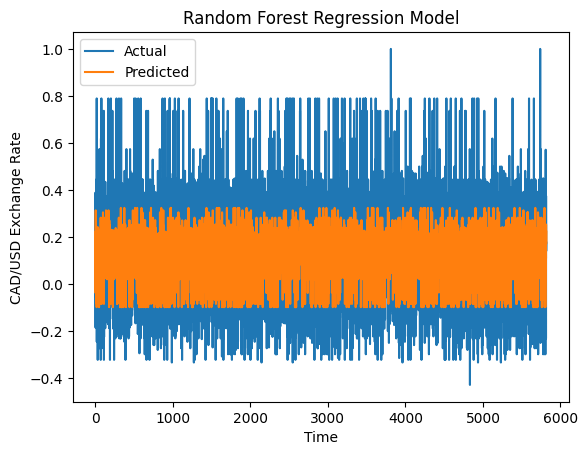

In [57]:
# Plot the actual vs. predicted values for the test data
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('CAD/USD Exchange Rate')
plt.title('Random Forest Regression Model')
plt.legend()
plt.show()